In [203]:
import pandas as pd
import numpy as np
import networkx as nx
#from infomap_detect import infomap_detect
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from itertools import permutations
import itertools
from matplotlib.colors import LinearSegmentedColormap
from projection import simple_weight,unweight,ycn
from collections import Counter
%matplotlib inline
plt.rcParams["figure.figsize"] = [20,20]

In [204]:
df = pd.read_csv("../data/disease_edgelist.csv")
df_att = pd.read_csv("../data/disease_attributes.csv",index_col="Id")
df = df.iloc[:1550]

In [205]:
G = nx.convert_matrix.from_pandas_edgelist(df,"Source","Target",create_using=nx.Graph())
nx.set_node_attributes(G,df_att.to_dict(orient="index"))

In [206]:
hdn, gdn = simple_weight(G)

In [207]:
len(hdn.nodes)

516

In [208]:
import infomap
import networkx as nx

def infomap_detect(G):
    """
    Partition network with the Infomap algorithm.
    Take a networkx graph as input, annotates nodes with 'community' id
    and return number of communities found.
    """
    
    #Create an Infomap instance
    infomapWrapper = infomap.Infomap("--two-level --silent")
    
    #Access the default network to add links
    network = infomapWrapper.network()
    
    #Add links and weight as optional third argument
    edges = nx.get_edge_attributes(G,"weight")
    for e in edges:
        x,y = e
        network.addLink(int(x),int(y),int(edges[e]))
    
    # Run the Infomap search algorithm to find optimal modules
    #print("Find communities with Infomap...")
    infomapWrapper.run()

    print("Found {} modules with codelength: {}".format(infomapWrapper.numTopModules(), infomapWrapper.codelength()))

    #Tree node iterator
    #print("Result")
    #print("\n#node module")
    communities = {}
    for node in infomapWrapper.iterTree():
        print("{} {}".format(node.path(), node.physicalId))
        if node.isLeaf():
            #print("{} {}".format(node.physicalId, node.moduleIndex()))
            communities[node.physicalId] = node.moduleIndex()

    nx.set_node_attributes(G, name='community', values=communities)
    return infomapWrapper.numTopModules(), communities

In [209]:
infomap_detect(hdn)

Found 52 modules with codelength: 4.68571347717724
() 0
(0,) 0
(0, 0) 30
(0, 1) 65
(0, 2) 79
(0, 3) 80
(0, 4) 99
(0, 5) 100
(0, 6) 128
(0, 7) 129
(0, 8) 177
(0, 9) 365
(0, 10) 366
(0, 11) 637
(0, 12) 786
(0, 13) 792
(0, 14) 841
(0, 15) 842
(0, 16) 960
(0, 17) 982
(1,) 0
(1, 0) 36
(1, 1) 37
(1, 2) 38
(1, 3) 39
(1, 4) 434
(2,) 0
(2, 0) 41
(2, 1) 109
(2, 2) 164
(2, 3) 429
(2, 4) 962
(2, 5) 1020
(2, 6) 48
(2, 7) 134
(2, 8) 542
(2, 9) 963
(2, 10) 86
(2, 11) 523
(2, 12) 524
(2, 13) 585
(2, 14) 897
(3,) 0
(3, 0) 42
(3, 1) 43
(3, 2) 44
(3, 3) 45
(3, 4) 46
(3, 5) 215
(3, 6) 324
(3, 7) 851
(3, 8) 958
(3, 9) 959
(3, 10) 965
(3, 11) 966
(3, 12) 1091
(3, 13) 1092
(3, 14) 1181
(3, 15) 1208
(4,) 0
(4, 0) 47
(4, 1) 380
(4, 2) 535
(4, 3) 536
(4, 4) 550
(4, 5) 795
(4, 6) 826
(4, 7) 833
(4, 8) 834
(4, 9) 835
(4, 10) 836
(4, 11) 947
(4, 12) 948
(5,) 0
(5, 0) 53
(5, 1) 54
(5, 2) 223
(5, 3) 231
(5, 4) 232
(5, 5) 322
(5, 6) 385
(5, 7) 386
(5, 8) 464
(5, 9) 814
(5, 10) 1033
(5, 11) 1034
(5, 12) 1130
(5, 13) 1

(52,
 {30: 0,
  65: 0,
  79: 0,
  80: 0,
  99: 0,
  100: 0,
  128: 0,
  129: 0,
  177: 0,
  365: 0,
  366: 0,
  637: 0,
  786: 0,
  792: 0,
  841: 0,
  842: 0,
  960: 0,
  982: 0,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  434: 1,
  41: 2,
  109: 2,
  164: 2,
  429: 2,
  962: 2,
  1020: 2,
  48: 2,
  134: 2,
  542: 2,
  963: 2,
  86: 2,
  523: 2,
  524: 2,
  585: 2,
  897: 2,
  42: 3,
  43: 3,
  44: 3,
  45: 3,
  46: 3,
  215: 3,
  324: 3,
  851: 3,
  958: 3,
  959: 3,
  965: 3,
  966: 3,
  1091: 3,
  1092: 3,
  1181: 3,
  1208: 3,
  47: 4,
  380: 4,
  535: 4,
  536: 4,
  550: 4,
  795: 4,
  826: 4,
  833: 4,
  834: 4,
  835: 4,
  836: 4,
  947: 4,
  948: 4,
  53: 5,
  54: 5,
  223: 5,
  231: 5,
  232: 5,
  322: 5,
  385: 5,
  386: 5,
  464: 5,
  814: 5,
  1033: 5,
  1034: 5,
  1130: 5,
  1174: 5,
  1242: 5,
  55: 6,
  374: 6,
  375: 6,
  376: 6,
  405: 6,
  406: 6,
  822: 6,
  888: 6,
  889: 6,
  1289: 6,
  77: 6,
  78: 6,
  555: 6,
  556: 6,
  557: 6,
  558: 6,
  559: 6,
  560: 6,
  817: 

In [201]:
def drawNetwork(G):
    # position map
    pos = nx.spring_layout(G) #a dictionary with nodes as keys and positions as values
    # community ids
    communities = [m for n,m in nx.get_node_attributes(G, 'community').items()]
    numCommunities = max(communities) + 1 #numTopModules
    # color map from http://colorbrewer2.org/
    cmapLight = colors.ListedColormap(['#a6cee3', '#b2df8a', '#fb9a99', '#fdbf6f', '#cab2d6'], 'indexed', numCommunities)
    cmapDark = colors.ListedColormap(['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a'], 'indexed', numCommunities)

    # Draw edges
    nx.draw_networkx_edges(G, pos)

    # Draw nodes
    nodeCollection = nx.draw_networkx_nodes(G,
        pos = pos,
        node_color = communities,
        cmap = cmapLight
    )
    # Set node border color to the darker shade
    darkColors = [cmapDark(m) for m in communities]
    nodeCollection.set_edgecolor(darkColors)

    # Draw node labels
    for n in G.nodes():
        plt.annotate(n,
            xy = pos[n],
            textcoords = 'offset points',
            horizontalalignment = 'center',
            verticalalignment = 'center',
            xytext = [0, 0],
            color = cmapDark(communities[n])
        )

    plt.axis('off')
    # plt.savefig("disease.png")
    plt.show()

In [202]:
plt.rcParams["figure.figsize"] = [20,20]
drawNetwork(hdn)

AttributeError: 'list' object has no attribute 'ListedColormap'

DGN_PCA example

In [179]:
B = nx.Graph()
B.add_nodes_from([1,2,3,4], bipartite=0) # Add the node attribute "bipartite"
B.add_nodes_from(['a','b','c'], bipartite=1)
B.add_edges_from([(1,'a'), (1,'b'), (1,'c'),(2,'b'), (2,'c'), (3,'c'), (4,'a')])

In [180]:
adj = nx.convert_matrix.to_numpy_matrix(B,nodelist=[1,2,3,4,'a','b','c'])
adj.shape

(7, 7)

In [181]:
adj

matrix([[0., 0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1., 0., 0.],
        [1., 0., 0., 1., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0., 0.]])

In [182]:
bi_adj = adj[4:,:4]
bi_adj_trans = adj[:4,4:]
bi_adj

matrix([[1., 0., 0., 1.],
        [1., 1., 0., 0.],
        [1., 1., 1., 0.]])

In [183]:
convert1 = np.divide(bi_adj,bi_adj.sum(0))
convert1

matrix([[0.33333333, 0.        , 0.        , 1.        ],
        [0.33333333, 0.5       , 0.        , 0.        ],
        [0.33333333, 0.5       , 1.        , 0.        ]])

In [198]:
mat = mat_transformation(convert1)
mat.transpose()

AttributeError: 'tuple' object has no attribute 'transpose'

In [221]:
def mat_transformation(convert1):
    con_T =  np.transpose(convert1).A
    new_con = []
    for row in con_T:
        indices = []
        val = 0
        combinations = None
        N = len(row)
        for idx,elm in enumerate(row):
            if elm != 0:
                indices.append(idx)
                val = elm
        if len(indices) >= 2:
            combinations = list(itertools.combinations(indices,2))
        if combinations:
            for first, sec in combinations:
                new_row_1 = np.zeros(N)
                new_row_2 = np.zeros(N)
                new_row_1[first] = val
                new_row_1[sec] = -val
                new_row_2[first] = -val
                new_row_2[sec] = val
                new_con.append(new_row_1)
                new_con.append(new_row_2)
        else:
            new_row_1 = np.zeros(N)
            new_row_2 = np.zeros(N)
            new_row_1[indices[0]] = val
            new_row_2[indices[0]] = -val
            new_con.append(new_row_1)
            new_con.append(new_row_2)
    new_con = np.array(new_con).transpose()
    return new_con

DGN_PCA our network

In [211]:
unique_dis = df["Source"].unique()
unique_gene = df["Target"].unique()

In [212]:
dis_nodes = sorted(list(unique_dis))
gene_nodes = sorted(list(unique_gene))

In [213]:
adj = nx.convert_matrix.to_numpy_matrix(G,nodelist=dis_nodes+gene_nodes)
adj.shape

(1419, 1419)

In [214]:
sum(np.sum(adj,1)) #sum of rows and columns have to be over one

matrix([[3100.]])

In [215]:
bi_adj = adj[len(unique_dis):,:len(unique_dis)]
bi_adj_trans = adj[:len(unique_dis),len(unique_dis):]
np.array_equal(bi_adj,np.transpose(bi_adj_trans))

True

In [216]:
sum(np.sum(bi_adj,1))

matrix([[1550.]])

In [217]:
convert1 = np.divide(bi_adj,bi_adj.sum(0))

In [222]:
convert1.shape

(903, 516)

In [223]:
new_convert = mat_transformation(convert1.transpose())

In [224]:
convert1.shape

(903, 516)

In [226]:
new_convert.shape

(516, 3728)

In [227]:
S = (new_convert @ new_convert.transpose())

In [228]:
S.shape

(516, 516)

In [229]:
v, w = np.linalg.eig(S)

In [230]:
v = v[np.argsort(v)]
w = w [np.argsort(v)]

In [231]:
w.shape

(516, 516)

In [232]:
v = v[1:]

In [233]:
def find_max(v,w):
    l = []
    for i in range(len(v)-1):
        l.append(v[i+1]-v[i])
    max_index = l.index(max(l))
    drop_col = [i for i in range(max_index + 1,len(v))]
    drop_col.append(0)
    v = v[:max_index]
    w = np.delete(w, drop_col, axis=1)
    print(max_index,drop_col)
    return v, w

In [234]:
new_v, new_w = find_max(v,w)

513 [514, 0]


In [235]:
new_w.shape

(516, 514)

In [236]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, max_iter=50).fit(new_w.real)

In [237]:
labels = list(kmeans.labels_)

In [238]:
counter = Counter()
for elm in labels:
    counter[elm] += 1

In [239]:
counter.most_common(25)

[(8, 461),
 (6, 13),
 (2, 12),
 (3, 8),
 (1, 7),
 (5, 6),
 (7, 4),
 (4, 3),
 (0, 1),
 (9, 1)]

In [240]:
for idx, node in enumerate(hdn.nodes):
    hdn.node[node]["PCA"] = labels[idx] 

/Users/viktortorpthomsen/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


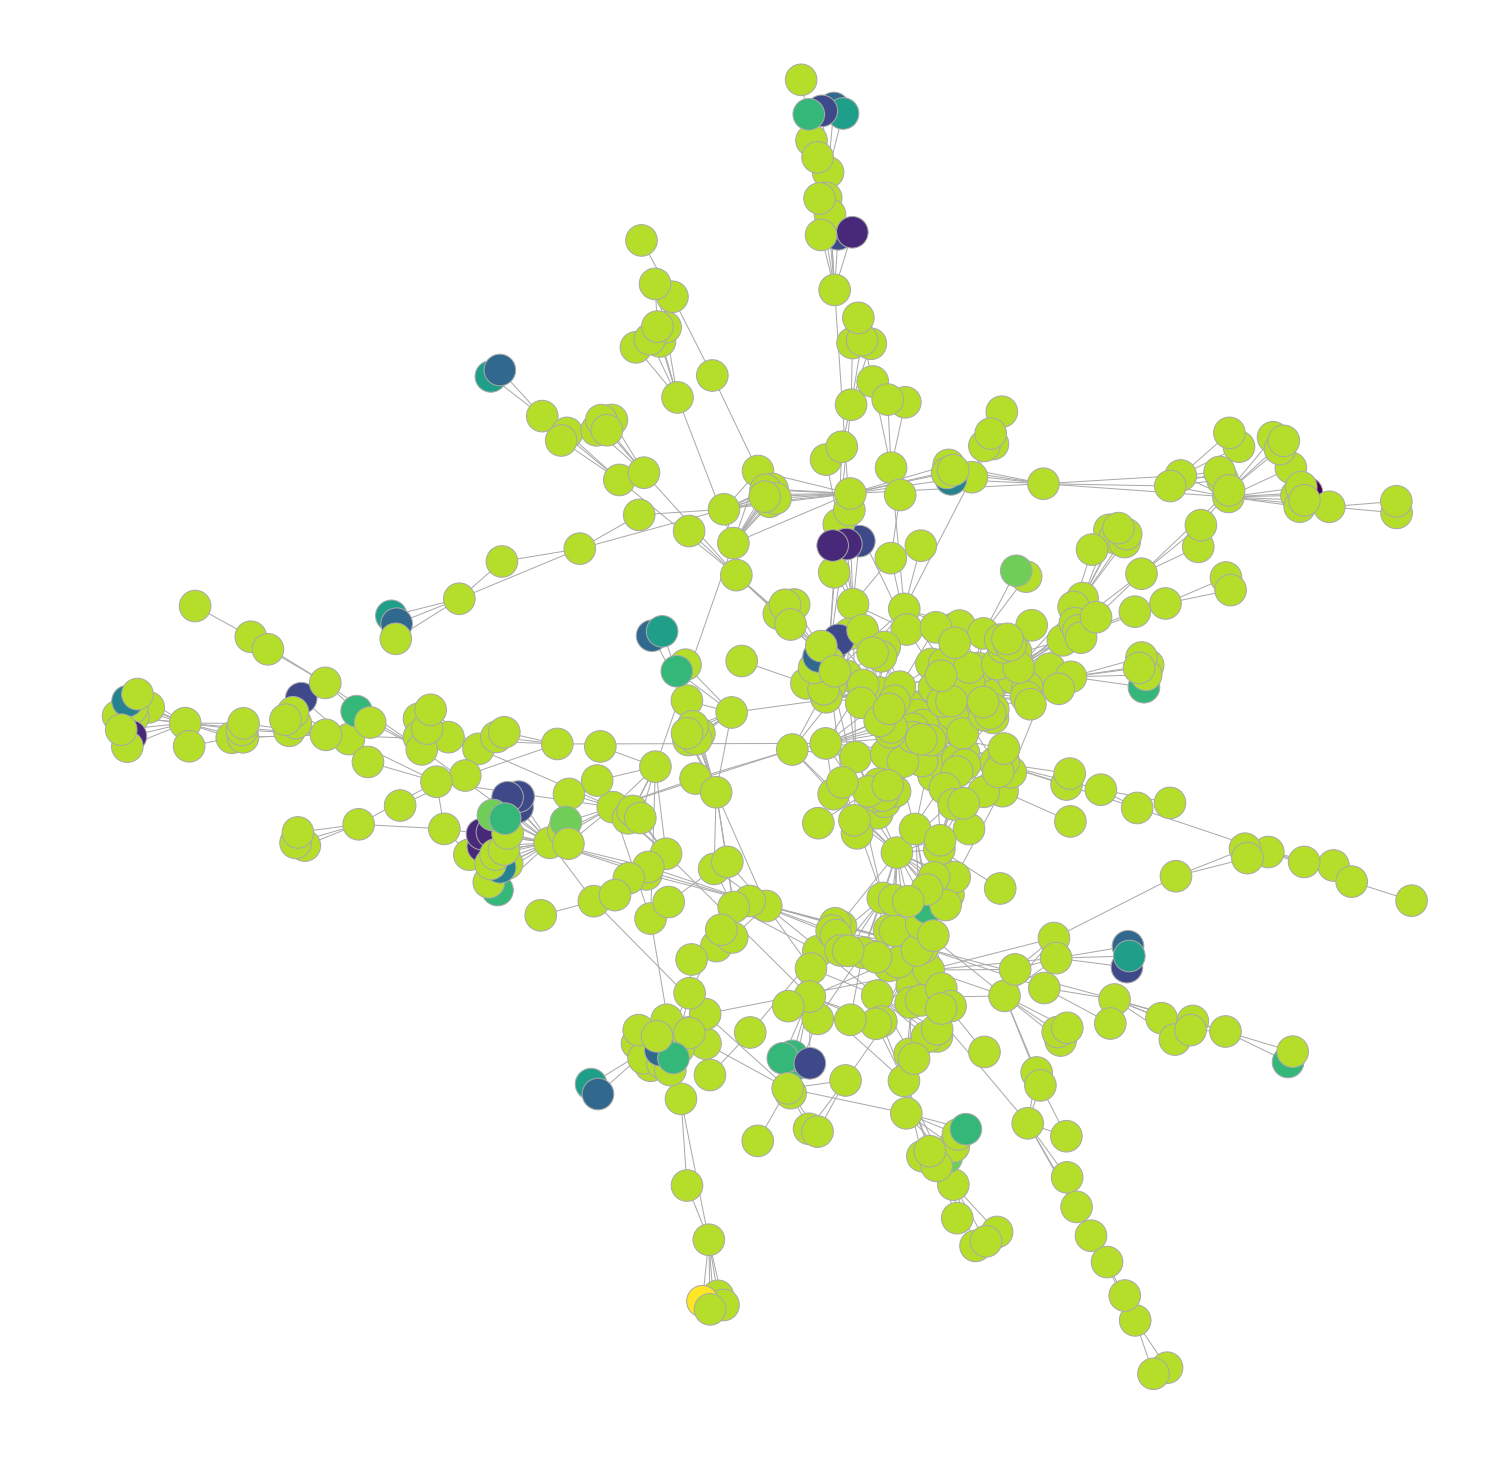

In [241]:
#degrees = G.degree(weight="weight")
#edges_weights = nx.get_edge_attributes(G,'weight')
colors = [hdn.node[node]["PCA"] for node in hdn.nodes]
nx.draw(hdn, linewidths=1,node_color=colors, node_size=1000)
ax = plt.gca() # to get the current axis
ax.collections[0].set_edgecolor("darkgrey") 
ax.collections[1].set_edgecolor("darkgrey") 

In [243]:
hdn.node[30]

{'community': 0, 'PCA': 8}